# Лабораторная работа №1: Pandas


Yelp — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

---

yelp_academic_dataset_business.json
| Признак      | Описание                                  | Тип     |
| ------------ | ----------------------------------------- | ------- |
| business_id  | Уникальный идентификатор компании         | object  |
| name         | Название компании                         | object  |
| address      | Адрес компании                            | object  |
| city         | Город, в котором находится компания       | object  |
| state        | Штат, в котором находится компания        | object  |
| postal_code  | Почтовый индекс                           | object  |
| latitude     | Широта                                    | float64 |
| longitude    | Долгота                                   | float64 |
| stars        | Рейтинг компании (от 1 до 5)              | float64 |
| review_count | Количество отзывов                        | int64   |
| is_open      | Статус работы компании (1 — да, 0 — нет)  | int64   |
| attributes   | Атрибуты компании (например, доступность) | object  |
| categories   | Категории услуг компании                  | object  |
| hours        | Часы работы компании                      | object  |

yelp_academic_dataset_review.json
| Признак     | Описание                              | Тип        |
| ----------- | ------------------------------------- | ---------- |
| review_id   | Уникальный идентификатор отзыва       | object     |
| user_id     | Уникальный идентификатор пользователя | object     |
| business_id | Уникальный идентификатор компании     | object     |
| stars       | Рейтинг отзыва (от 1 до 5)            | int64      |
| useful      | Количество полезных голосов           | int64      |
| funny       | Количество голосов "смешно"           | int64      |
| cool        | Количество голосов "классно"          | int64      |
| text        | Текст отзыва                          | object     |
| date        | Дата написания отзыва                 | datetime64 |

## Считывание датасетов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from ipywidgets import interact, widgets

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

In [2]:
data_business = pd.read_json('yelp_academic_dataset_business.json', lines=True)


## Типичные операции над датафреймом

In [3]:
data_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [4]:
data_business.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [5]:
# Считывание значения конкретной ячейки
data_business.at[random.randint(0,100), 'stars']

2.5

In [6]:
# Фильтрация набора данных по какому-либо условию.
high_rated = data_business[data_business['stars'] > 4.5]
len(high_rated) < len(data_business)

True

In [7]:
# удаление строк с пропущенными значениями;
df_dropped = data_business.dropna()
len(df_dropped) == len(data_business)

False

In [8]:
# заполнение пропущенных значений средним значением по колонке.
data_business.loc[0:5, 'stars'] = np.nan
data_business['stars'].fillna(data_business['stars'].mean(), inplace=True)

data_business.head(7)

C:\Users\eugene\AppData\Local\Temp\ipykernel_16168\3776409358.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_business['stars'].fillna(data_business['stars'].mean(), inplace=True)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,3.596721,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.596721,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.596721,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,3.596721,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,3.596721,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,3.596721,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.500000,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."


In [9]:
# Создание нового поля, вычисленного на основе значений других полей:
data_business['rating_weighted'] = data_business['stars'] * data_business['review_count']
data_business['rating_weighted']

0          25.177045
1          53.950811
2          79.127857
3         287.737661
4          46.757370
             ...    
150341     39.000000
150342     20.000000
150343     28.000000
150344     96.000000
150345     40.500000
Name: rating_weighted, Length: 150346, dtype: float64

In [10]:
def categorize_business(row):
    return "Popular" if row['review_count'] > 100 else "Regular"

data_business['business_category'] = data_business.apply(categorize_business, axis=1)

data_business['is_high_rated'] = data_business['stars'].apply(lambda x: x >= 4.5)
data_business[data_business['is_high_rated']== True]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,rating_weighted,business_category,is_high_rated
13,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755,27.966235,-82.787412,5.0,10,1,{'ByAppointmentOnly': 'True'},"General Dentistry, Dentists, Health & Medical,...","{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:3...",50.0,Regular,True
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...",450.0,Regular,True
16,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,AZ,85705,32.229872,-110.972342,4.5,10,1,"{'DriveThru': 'False', 'BusinessAcceptsCreditC...","Automotive, Auto Parts & Supplies, Auto Custom...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '...",45.0,Regular,True
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",922.5,Popular,True
25,PSo_C1Sfa13JHjzVNW6ziQ,Indian Walk Veterinary Center,662 Durham Rd,Newtown,PA,18940,40.273493,-74.987496,5.0,15,1,None,"Pet Services, Pet Groomers, Pets, Veterinarians","{'Monday': '8:0-19:0', 'Tuesday': '8:0-19:0', ...",75.0,Regular,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150334,LJ4GjQ1HL6kqvIPpNUNNaQ,Shanti Yoga and Ayurveda,"1638 Pine St, Fl 1",Philadelphia,PA,19103,39.945966,-75.169666,4.5,39,1,"{'ByAppointmentOnly': 'True', 'GoodForKids': '...","Health & Medical, Yoga, Shopping, Naturopathic...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",175.5,Regular,True
150336,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",157.5,Regular,True
150339,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,19014,39.856185,-75.427725,4.5,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",63.0,Regular,True
150340,hn9Toz3s-Ei3uZPt7esExA,West Side Kebab House,2470 Guardian Road NW,Edmonton,AB,T5T 1K8,53.509649,-113.675999,4.5,18,0,"{'Ambience': '{'touristy': False, 'hipster': F...","Middle Eastern, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",81.0,Regular,True


In [11]:
# Сортировка по количеству отзывов
sorted_df = data_business.sort_values(by='review_count', ascending=False)
sorted_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,rating_weighted,business_category,is_high_rated
113731,_ab50qdWOk0DdB6XOrBitw,Acme Oyster House,724 Iberville St,New Orleans,LA,70130,29.954273,-90.068965,4.0,7568,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ''fu...","Live/Raw Food, Seafood, Restaurants, Cajun/Creole","{'Monday': '11:0-22:0', 'Thursday': '11:0-22:0...",30272.0,Popular,False
112552,ac1AeYqs8Z4_e2X5M3if2A,Oceana Grill,739 Conti St,New Orleans,LA,70130,29.956231,-90.067563,4.0,7400,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Seafood, Cajun/Creole, Breakfast ...","{'Monday': '8:0-1:0', 'Tuesday': '8:0-1:0', 'W...",29600.0,Popular,False
91757,GXFMD0Z4jEVZBCsbPf4CTQ,Hattie B’s Hot Chicken - Nashville,112 19th Ave S,Nashville,TN,37203,36.151387,-86.796603,4.5,6093,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","American (Traditional), Chicken Shop, Southern...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ...",27418.5,Popular,True
143157,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,51 N 12th St,Philadelphia,PA,19107,39.953341,-75.158855,4.5,5721,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Candy Stores, Shopping, Department Stores, Fas...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",25744.5,Popular,True
147081,oBNrLz4EDhiscSlbOl8uAw,Ruby Slipper - New Orleans,200 Magazine St,New Orleans,LA,70130,29.951025,-90.067394,4.5,5193,1,"{'NoiseLevel': ''loud'', 'Caters': 'False', 'B...","Restaurants, American (Traditional), American ...","{'Monday': '0:0-0:0', 'Tuesday': '7:30-14:0', ...",23368.5,Popular,True


In [12]:
# Вычисление нескольких статистик по колонкам
data_business[['stars', 'review_count']].agg(['mean', 'median', 'min', 'max'])


,stars,review_count
mean,3.596721,44.866561
median,3.500000,15.000000
min,1.000000,5.000000
max,5.000000,7568.000000


In [13]:
# Вывод количества значений по категориям
data_business['city'].value_counts()

city
Philadelphia      14569
Tucson             9250
Tampa              9050
Indianapolis       7540
Nashville          6971
                  ...  
Gentilly              1
pennsauken            1
Hamiltion             1
Newtown square        1
Apollo beach          1
Name: count, Length: 1416, dtype: int64

In [14]:
# Уникальные значения в колонке 'state'
data_business['state'].unique()

array(['CA', 'MO', 'AZ', 'PA', 'TN', 'FL', 'IN', 'LA', 'AB', 'NV', 'ID',
       'DE', 'IL', 'NJ', 'NC', 'CO', 'WA', 'HI', 'UT', 'TX', 'MT', 'MI',
       'SD', 'XMS', 'MA', 'VI', 'VT'], dtype=object)

## Продемонстрировать работу `.groupby`, на основе группировок в groupby вычислить агрегатные функции по одной или нескольким колонкам.



In [15]:
# Пять городов, по которым присутствует информация о наибольшем количестве компаний
city_counts = data_business.groupby('city')['business_id'].count().reset_index()

city_counts.columns = ['city', 'company_count']

top_cities = city_counts.sort_values(by='company_count', ascending=False).head(5)



## Решейпинг данных 1D→2D с использованием `.pivot`
можно подать на вход результаты агрегатов, полученных ранее с использованием .groupby (сгруппировать по двум полям)

In [16]:
# Решейпинг 1D -> 2D с использованием .pivot
grouped = data_business.groupby(['state', 'city'])['stars'].mean().reset_index()
pivot_df = grouped.pivot(index='state', columns='city', values='stars')
print(pivot_df)

city   AB Edmonton  AMBLER  ARDMORE  AVON  Abington  Abington Township  \
state                                                                    
AB             4.5     NaN      NaN   NaN       NaN                NaN   
AZ             NaN     NaN      NaN   NaN       NaN                NaN   
CA             NaN     NaN      NaN   NaN       NaN                NaN   
CO             NaN     NaN      NaN   NaN       NaN                NaN   
DE             NaN     NaN      NaN   NaN       NaN                NaN   
FL             NaN     NaN      NaN   NaN       NaN                NaN   
HI             NaN     NaN      NaN   NaN       NaN                NaN   
ID             NaN     NaN      NaN   NaN       NaN                NaN   
IL             NaN     NaN      NaN   NaN       NaN                NaN   
IN             NaN     NaN      NaN   3.5       NaN                NaN   
LA             NaN     NaN      NaN   NaN       NaN                NaN   
MA             NaN     NaN      NaN   

## Решейпинг 1D→2D данных, соединённых с группировкой / агрегацией (одним словом - сводная таблица): `.pivot_table`
Группировать только по категориальным полям или числовым, если значений немного.



In [17]:
data_review = pd.read_json('yelp_academic_dataset_review.json', lines=True)

### Для уменьшения таблицы оставим только город с наибольшим количеством компаний

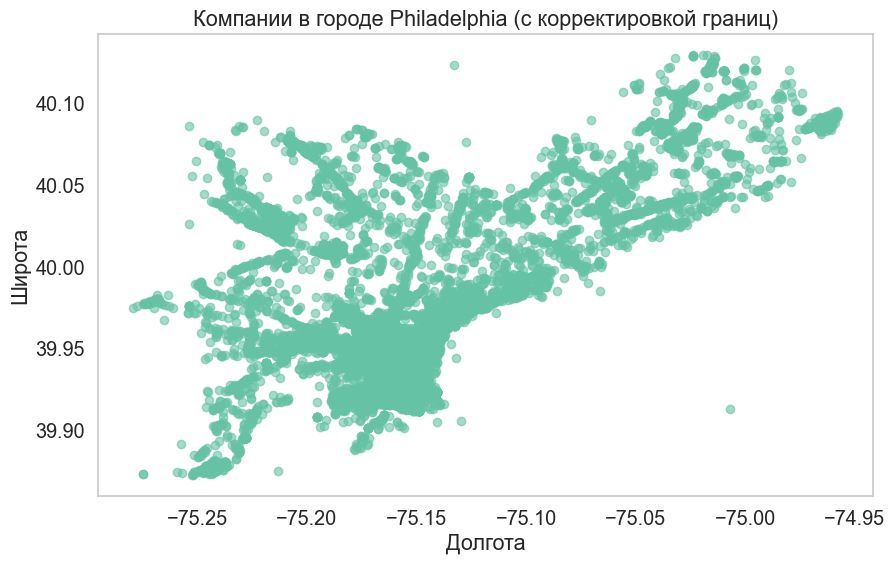

In [18]:
data_business = data_business[data_business['city'] == 'Philadelphia']

# Задаем границы для Филадельфии
min_longitude, max_longitude = -75.28, -74.95
min_latitude, max_latitude = 39.87, 40.13

# Фильтрация данных на основе границ
filtered_data = data_business[
    (data_business['longitude'] >= min_longitude) & 
    (data_business['longitude'] <= max_longitude) & 
    (data_business['latitude'] >= min_latitude) & 
    (data_business['latitude'] <= max_latitude)
]

# Визуализация отфильтрованных данных
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['longitude'], filtered_data['latitude'], alpha=0.6)
plt.title('Компании в городе Philadelphia (с корректировкой границ)')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.grid()
plt.show()

In [19]:
philadelphia_business_ids = filtered_data['business_id'].tolist()

data_review.set_index('business_id', inplace=True)
philadelphia_reviews = data_review.loc[philadelphia_business_ids]
philadelphia_reviews.reset_index(inplace=True)

In [20]:
review_stats = philadelphia_reviews.groupby('business_id').aggregate(
    avg_rating=('stars', 'mean'),  # Средняя оценка
    num_reviews=('stars', 'count')  # Количество отзывов
).reset_index()
review_stats

,business_id,avg_rating,num_reviews
0,--OS_I7dnABrXvRCCuWOGQ,4.200000,5
1,--sXnWH9Xm6_NvIjyuA99w,4.103448,29
2,-0M0b-XhtFagyLmsBtOe8w,3.722222,18
3,-0PN_KFPtbnLQZEeb23XiA,3.363636,11
4,-0TffRSXXIlBYVbb5AwfTg,4.355124,1132
...,...,...,...
14510,zyge4T5eSiPHq1-IaJb_Qg,1.800000,10
14511,zyghhZzPgb1bRAIYB-oi1w,5.000000,12
14512,zz-fcqurtm77bZ_rVvo2Lw,4.480000,25
14513,zz3E7kmJI2r2JseE6LAnrw,3.718447,103


In [21]:
# Устанавливаем 'business_id' в качестве индекса для обеих таблиц 
filtered_data.set_index('business_id', inplace=True) 
review_stats.set_index('business_id', inplace=True) 
 
# Объединяем таблицы 
combined_data = filtered_data.join(review_stats, how='inner') 
 
# Выбираем нужные колонки 
combined_data = combined_data[['latitude', 'longitude', 'categories', 'name', 'avg_rating', 'num_reviews']]
 
# Выводим полученную таблицу 
combined_data


,latitude,longitude,categories,name,avg_rating,num_reviews
business_id,,,,,,
MTSW4McQd7CbVtyjqoe9mw,39.955505,-75.155564,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",St Honore Pastries,4.057471,87
MUTTqe8uqyMdBl186RmNeA,39.953949,-75.143226,"Sushi Bars, Restaurants, Japanese",Tuna Bar,4.200000,250
ROeacJQwBeh05Rqg7F6TCg,39.943223,-75.162568,"Korean, Restaurants",BAP,4.317308,208
QdN72BWoyFypdGJhhI5r7g,39.939825,-75.157447,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",Bar One,3.884058,69
Mjboz24M9NlBeiOJKLEd_Q,40.022466,-75.218314,"Pizza, Restaurants, Salad, Soup",DeSandro on Main,2.804878,41
...,...,...,...,...,...,...
wPAaAbFbq5wfLfW0gnYU7g,39.950060,-75.170129,"Fashion, Shopping, Women's Clothing",Intermix,2.200000,10
JDM7kiCEmeBc_5W-z6eZZw,39.968806,-75.180608,"Real Estate, Apartments, Home Services",2601 Parkway Apartments,3.166667,6
9U1Igcpe954LoWZRmNc-zg,39.932756,-75.144504,"Day Spas, Beauty & Spas, Skin Care, Massage",Hand & Stone Massage And Facial Spa,3.156250,32


In [22]:
combined_data.reset_index()

,business_id,latitude,longitude,categories,name,avg_rating,num_reviews
0,MTSW4McQd7CbVtyjqoe9mw,39.955505,-75.155564,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",St Honore Pastries,4.057471,87
1,MUTTqe8uqyMdBl186RmNeA,39.953949,-75.143226,"Sushi Bars, Restaurants, Japanese",Tuna Bar,4.200000,250
2,ROeacJQwBeh05Rqg7F6TCg,39.943223,-75.162568,"Korean, Restaurants",BAP,4.317308,208
3,QdN72BWoyFypdGJhhI5r7g,39.939825,-75.157447,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",Bar One,3.884058,69
4,Mjboz24M9NlBeiOJKLEd_Q,40.022466,-75.218314,"Pizza, Restaurants, Salad, Soup",DeSandro on Main,2.804878,41
...,...,...,...,...,...,...,...
14510,wPAaAbFbq5wfLfW0gnYU7g,39.950060,-75.170129,"Fashion, Shopping, Women's Clothing",Intermix,2.200000,10
14511,JDM7kiCEmeBc_5W-z6eZZw,39.968806,-75.180608,"Real Estate, Apartments, Home Services",2601 Parkway Apartments,3.166667,6
14512,9U1Igcpe954LoWZRmNc-zg,39.932756,-75.144504,"Day Spas, Beauty & Spas, Skin Care, Massage",Hand & Stone Massage And Facial Spa,3.156250,32
14513,LJ4GjQ1HL6kqvIPpNUNNaQ,39.945966,-75.169666,"Health & Medical, Yoga, Shopping, Naturopathic...",Shanti Yoga and Ayurveda,4.575000,40


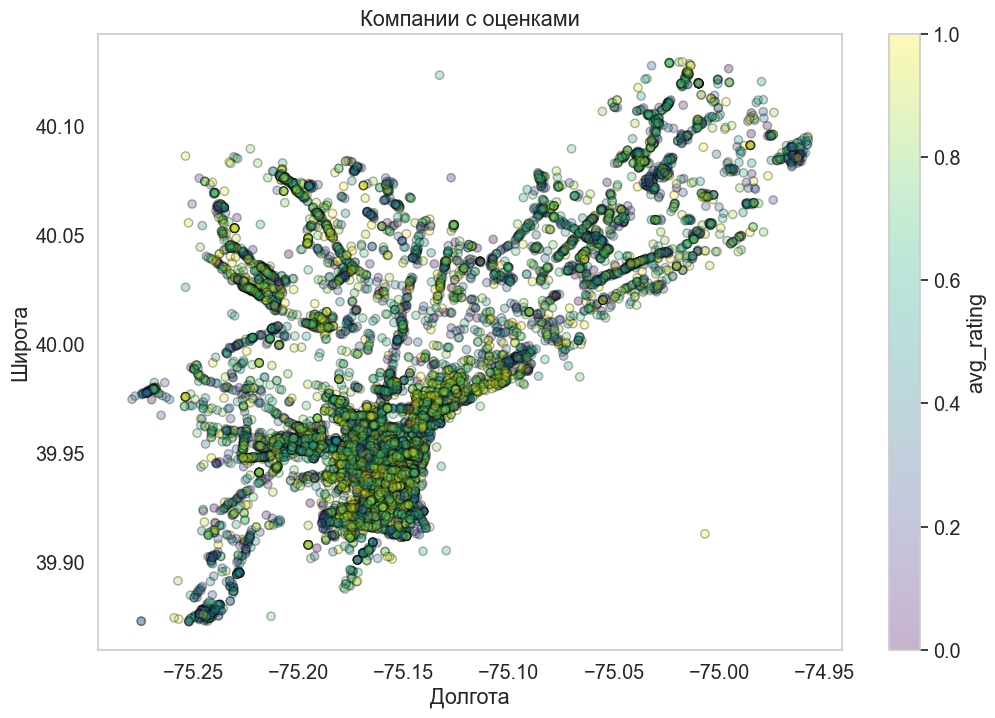

In [23]:
# Нормализуем значения средней оценки для отображения цвета (от 0 до 1)
min_rating = combined_data['avg_rating'].min()
max_rating = combined_data['avg_rating'].max()
combined_data['color'] = (combined_data['avg_rating'] - min_rating) / (max_rating - min_rating)

# Создаем график
plt.figure(figsize=(12, 8))

# Наносим точки на график с прозрачностью
scatter = plt.scatter(
    combined_data['longitude'],
    combined_data['latitude'],
    c=combined_data['color'],  # Используем нормализованное значение для цвета
    cmap='viridis',  # Цветовая палитра
    alpha=0.3,  # Прозрачность
    edgecolor='k'  # Обводка точек
)

# Добавляем цветовую шкалу
plt.colorbar(scatter, label='avg_rating')

# Устанавливаем названия осей и заголовок
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Компании с оценками')
plt.grid()

# Показываем график
plt.show()

In [24]:
cell_size = 0.1

# Округление широты и долготы
combined_data['rounded_latitude'] = np.round(combined_data['latitude'] / cell_size) * cell_size
combined_data['rounded_longitude'] = np.round(combined_data['longitude'] / cell_size) * cell_size

combined_data[['rounded_latitude', 'rounded_longitude', 'name']]


,rounded_latitude,rounded_longitude,name
business_id,,,
MTSW4McQd7CbVtyjqoe9mw,40.0,-75.2,St Honore Pastries
MUTTqe8uqyMdBl186RmNeA,40.0,-75.1,Tuna Bar
ROeacJQwBeh05Rqg7F6TCg,39.9,-75.2,BAP
QdN72BWoyFypdGJhhI5r7g,39.9,-75.2,Bar One
Mjboz24M9NlBeiOJKLEd_Q,40.0,-75.2,DeSandro on Main
...,...,...,...
wPAaAbFbq5wfLfW0gnYU7g,40.0,-75.2,Intermix
JDM7kiCEmeBc_5W-z6eZZw,40.0,-75.2,2601 Parkway Apartments
9U1Igcpe954LoWZRmNc-zg,39.9,-75.1,Hand & Stone Massage And Facial Spa


In [25]:
combined_data.reset_index(inplace=True)

In [26]:
combined_data['rounded_latitude'] = combined_data['rounded_latitude'].round(1)
combined_data['rounded_longitude'] = combined_data['rounded_longitude'].round(1)

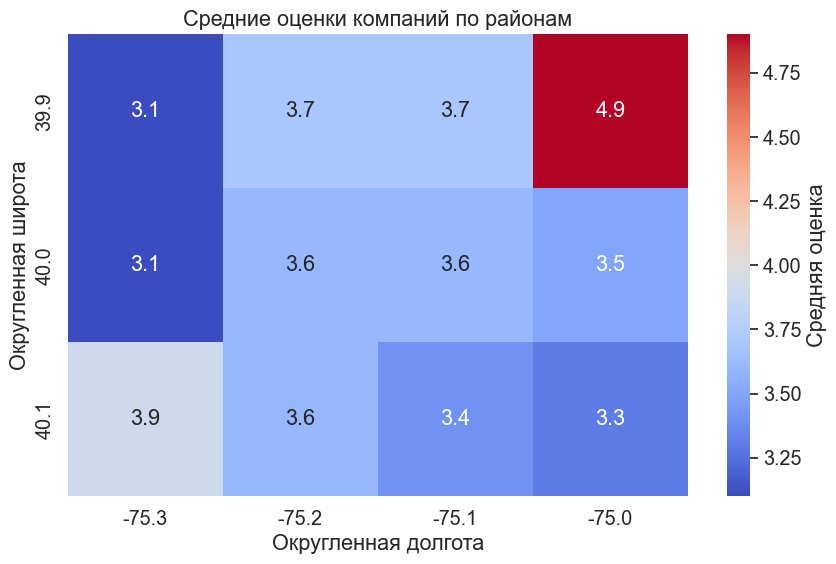

In [27]:
pivot_table = pd.pivot_table(combined_data, 
                             values='avg_rating', 
                             index='rounded_latitude', 
                             columns='rounded_longitude', 
                             aggfunc='mean').round(1)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar_kws={'label': 'Средняя оценка'})
plt.title('Средние оценки компаний по районам')
plt.xlabel('Округленная долгота')
plt.ylabel('Округленная широта')
plt.show()

In [28]:
company_counts = combined_data.groupby(['rounded_latitude', 'rounded_longitude']).size().reset_index(name='company_count')

filtered_counts = company_counts[company_counts['company_count'] >= 30]

filtered_df = combined_data.merge(filtered_counts[['rounded_latitude', 'rounded_longitude']], 
                        on=['rounded_latitude', 'rounded_longitude'])

filtered_pivot_table = pd.pivot_table(filtered_df, 
                                       values='avg_rating', 
                                       index='rounded_latitude', 
                                       columns='rounded_longitude', 
                                       aggfunc='mean')

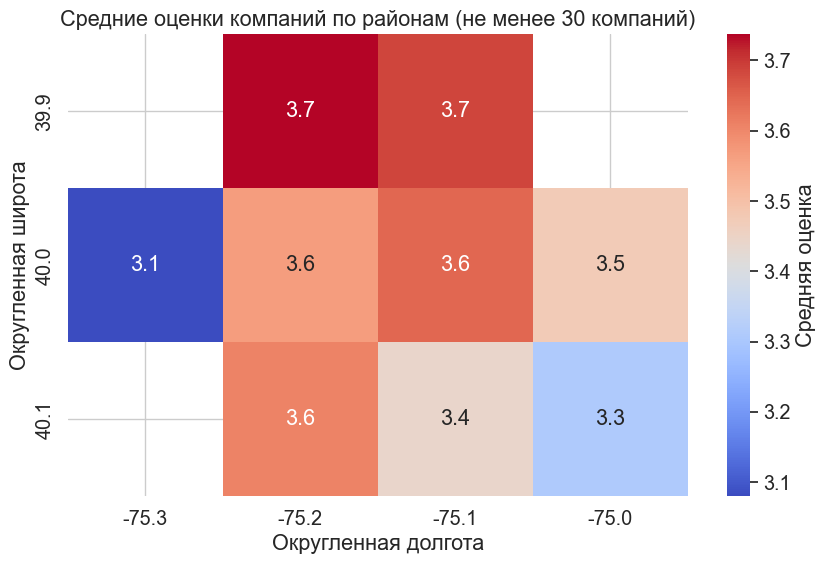

In [29]:
# Визуализация сводной таблицы
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_pivot_table, annot=True, cmap='coolwarm', 
            cbar_kws={'label': 'Средняя оценка'},
            vmin=filtered_pivot_table.min().min(),  # Минимальная оценка в отфильтрованной таблице
            vmax=filtered_pivot_table.max().max())  # Максимальная оценка в отфильтрованной таблице
plt.title('Средние оценки компаний по районам (не менее 30 компаний)')
plt.xlabel('Округленная долгота')
plt.ylabel('Округленная широта')
plt.show()

## Вычислить квантили распределения какого-либо вещественного признака

#### Чтобы было интереснее, составим таблицу о всех ресторанах в Филадельфии

In [30]:
# Заменяем ';' на ',' для унификации разделителей
combined_data['categories'] = combined_data['categories'].str.replace(';', ',', regex=False)

# Фильтрация записей, содержащих 'restaurant' в любом регистре и с не менее чем 5 отзывами
filtered_data = combined_data[
    combined_data['categories'].str.contains('restaurant', case=False, na=False) &
    (combined_data['num_reviews'] >= 20)  # Условие на количество отзывов
]

# Вывод результатов
filtered_data

,business_id,latitude,longitude,categories,name,avg_rating,num_reviews,color,rounded_latitude,rounded_longitude
0,MTSW4McQd7CbVtyjqoe9mw,39.955505,-75.155564,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",St Honore Pastries,4.057471,87,0.764368,40.0,-75.2
1,MUTTqe8uqyMdBl186RmNeA,39.953949,-75.143226,"Sushi Bars, Restaurants, Japanese",Tuna Bar,4.200000,250,0.800000,40.0,-75.1
2,ROeacJQwBeh05Rqg7F6TCg,39.943223,-75.162568,"Korean, Restaurants",BAP,4.317308,208,0.829327,39.9,-75.2
3,QdN72BWoyFypdGJhhI5r7g,39.939825,-75.157447,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",Bar One,3.884058,69,0.721014,39.9,-75.2
4,Mjboz24M9NlBeiOJKLEd_Q,40.022466,-75.218314,"Pizza, Restaurants, Salad, Soup",DeSandro on Main,2.804878,41,0.451220,40.0,-75.2
...,...,...,...,...,...,...,...,...,...,...
14498,auwFZzfhe2pvFw43OfsAfw,39.925205,-75.174728,"Pizza, Restaurants, Mediterranean",Stina Pizzeria,4.643478,115,0.910870,39.9,-75.2
14507,gPr1io7ks0Eo3FDsnDTYfg,40.060414,-75.191084,"Sandwiches, Restaurants, Italian",Tata Cafe,4.045455,22,0.761364,40.1,-75.2
14508,wVxXRFf10zTTAs11nr4xeA,40.032483,-75.214430,"Restaurants, Specialty Food, Food, Sandwiches,...",PrimoHoagies,3.271186,59,0.567797,40.0,-75.2
14509,8n93L-ilMAsvwUatarykSg,39.951018,-75.198240,"Coffee & Tea, Food, Sandwiches, American (Trad...",Kitchen Gia,2.818182,22,0.454545,40.0,-75.2


In [31]:
quantiles_avg_rating = np.quantile(filtered_data['avg_rating'], [0.25, 0.5, 0.75])
print("Квантили для avg_rating:")
print("25-й процентиль:", quantiles_avg_rating[0])
print("50-й процентиль (медиана):", quantiles_avg_rating[1])
print("75-й процентиль:", quantiles_avg_rating[2])

Квантили для avg_rating:
25-й процентиль: 3.240549828178694
50-й процентиль (медиана): 3.7467811158798283
75-й процентиль: 4.158914728682171


In [32]:
hist, bin_edges = np.histogram(filtered_data['num_reviews'], bins=5)
hist

array([3878,   39,   10,    1,    1], dtype=int64)

In [33]:
for index, row in filtered_data.iterrows():
    print(f"Ресторан: {row['name']}, Средний рейтинг: {row['avg_rating']}")

Ресторан: St Honore Pastries, Средний рейтинг: 4.057471264367816
Ресторан: Tuna Bar, Средний рейтинг: 4.2
Ресторан: BAP, Средний рейтинг: 4.3173076923076925
Ресторан: Bar One, Средний рейтинг: 3.8840579710144927
Ресторан: DeSandro on Main, Средний рейтинг: 2.8048780487804876
Ресторан: Craft Hall, Средний рейтинг: 3.4545454545454546
Ресторан: Wawa, Средний рейтинг: 3.1403508771929824
Ресторан: Golden Chopstick Chinese Restaurant, Средний рейтинг: 3.054421768707483
Ресторан: J Sushi, Средний рейтинг: 4.613333333333333
Ресторан: Red Hook Coffee & Tea, Средний рейтинг: 4.484210526315789
Ресторан: Shanghai Station, Средний рейтинг: 4.0625
Ресторан: Brown Sugar Bakery & Cafe, Средний рейтинг: 4.2727272727272725
Ресторан: Jon's Bar & Grille, Средний рейтинг: 3.05
Ресторан: Acadia, Средний рейтинг: 3.8875
Ресторан: The Love, Средний рейтинг: 4.247244094488189
Ресторан: Jong Ka Jib, Средний рейтинг: 4.437325905292479
Ресторан: The Twisted Tail, Средний рейтинг: 3.8896
Ресторан: Bistro St. Trope

## `MultiIndex`

In [34]:
filtered_data.set_index(['business_id', 'name'], inplace=True)
filtered_data

,,latitude,longitude,categories,avg_rating,num_reviews,color,rounded_latitude,rounded_longitude
business_id,name,,,,,,,,
MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,39.955505,-75.155564,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4.057471,87,0.764368,40.0,-75.2
MUTTqe8uqyMdBl186RmNeA,Tuna Bar,39.953949,-75.143226,"Sushi Bars, Restaurants, Japanese",4.200000,250,0.800000,40.0,-75.1
ROeacJQwBeh05Rqg7F6TCg,BAP,39.943223,-75.162568,"Korean, Restaurants",4.317308,208,0.829327,39.9,-75.2
QdN72BWoyFypdGJhhI5r7g,Bar One,39.939825,-75.157447,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",3.884058,69,0.721014,39.9,-75.2
Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,40.022466,-75.218314,"Pizza, Restaurants, Salad, Soup",2.804878,41,0.451220,40.0,-75.2
...,...,...,...,...,...,...,...,...,...
auwFZzfhe2pvFw43OfsAfw,Stina Pizzeria,39.925205,-75.174728,"Pizza, Restaurants, Mediterranean",4.643478,115,0.910870,39.9,-75.2
gPr1io7ks0Eo3FDsnDTYfg,Tata Cafe,40.060414,-75.191084,"Sandwiches, Restaurants, Italian",4.045455,22,0.761364,40.1,-75.2
wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,40.032483,-75.214430,"Restaurants, Specialty Food, Food, Sandwiches,...",3.271186,59,0.567797,40.0,-75.2


In [35]:
filtered_data

,,latitude,longitude,categories,avg_rating,num_reviews,color,rounded_latitude,rounded_longitude
business_id,name,,,,,,,,
MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,39.955505,-75.155564,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4.057471,87,0.764368,40.0,-75.2
MUTTqe8uqyMdBl186RmNeA,Tuna Bar,39.953949,-75.143226,"Sushi Bars, Restaurants, Japanese",4.200000,250,0.800000,40.0,-75.1
ROeacJQwBeh05Rqg7F6TCg,BAP,39.943223,-75.162568,"Korean, Restaurants",4.317308,208,0.829327,39.9,-75.2
QdN72BWoyFypdGJhhI5r7g,Bar One,39.939825,-75.157447,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",3.884058,69,0.721014,39.9,-75.2
Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,40.022466,-75.218314,"Pizza, Restaurants, Salad, Soup",2.804878,41,0.451220,40.0,-75.2
...,...,...,...,...,...,...,...,...,...
auwFZzfhe2pvFw43OfsAfw,Stina Pizzeria,39.925205,-75.174728,"Pizza, Restaurants, Mediterranean",4.643478,115,0.910870,39.9,-75.2
gPr1io7ks0Eo3FDsnDTYfg,Tata Cafe,40.060414,-75.191084,"Sandwiches, Restaurants, Italian",4.045455,22,0.761364,40.1,-75.2
wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,40.032483,-75.214430,"Restaurants, Specialty Food, Food, Sandwiches,...",3.271186,59,0.567797,40.0,-75.2


In [36]:
df_swapped = filtered_data.swaplevel('business_id', 'name')

In [37]:
df_swapped

,,latitude,longitude,categories,avg_rating,num_reviews,color,rounded_latitude,rounded_longitude
name,business_id,,,,,,,,
St Honore Pastries,MTSW4McQd7CbVtyjqoe9mw,39.955505,-75.155564,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4.057471,87,0.764368,40.0,-75.2
Tuna Bar,MUTTqe8uqyMdBl186RmNeA,39.953949,-75.143226,"Sushi Bars, Restaurants, Japanese",4.200000,250,0.800000,40.0,-75.1
BAP,ROeacJQwBeh05Rqg7F6TCg,39.943223,-75.162568,"Korean, Restaurants",4.317308,208,0.829327,39.9,-75.2
Bar One,QdN72BWoyFypdGJhhI5r7g,39.939825,-75.157447,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",3.884058,69,0.721014,39.9,-75.2
DeSandro on Main,Mjboz24M9NlBeiOJKLEd_Q,40.022466,-75.218314,"Pizza, Restaurants, Salad, Soup",2.804878,41,0.451220,40.0,-75.2
...,...,...,...,...,...,...,...,...,...
Stina Pizzeria,auwFZzfhe2pvFw43OfsAfw,39.925205,-75.174728,"Pizza, Restaurants, Mediterranean",4.643478,115,0.910870,39.9,-75.2
Tata Cafe,gPr1io7ks0Eo3FDsnDTYfg,40.060414,-75.191084,"Sandwiches, Restaurants, Italian",4.045455,22,0.761364,40.1,-75.2
PrimoHoagies,wVxXRFf10zTTAs11nr4xeA,40.032483,-75.214430,"Restaurants, Specialty Food, Food, Sandwiches,...",3.271186,59,0.567797,40.0,-75.2


In [38]:
df_transposed = filtered_data.T

In [39]:
df_transposed

business_id,MTSW4McQd7CbVtyjqoe9mw,MUTTqe8uqyMdBl186RmNeA,ROeacJQwBeh05Rqg7F6TCg,QdN72BWoyFypdGJhhI5r7g,Mjboz24M9NlBeiOJKLEd_Q,aPNXGTDkf-4bjhyMBQxqpQ,ppFCk9aQkM338Rgwpl2F5A,3BJxm-HnvzdwD1zjmSbmyQ,WYYdQDjx-DsCanlP0DpImQ,bTve2mwLk5Zc01vRKqc2KQ,...,ij_dE1TNqe_BHrzEGAWU4w,bmJgvpuf2GBXd62ELK0Q2w,w9_EQB0SuAFYxPMcfY_P_g,TKPAyOWcexkpVHPCdYTNmQ,nHsVsOms41FRXcFQM9mGXw,auwFZzfhe2pvFw43OfsAfw,gPr1io7ks0Eo3FDsnDTYfg,wVxXRFf10zTTAs11nr4xeA,8n93L-ilMAsvwUatarykSg,WnT9NIzQgLlILjPT0kEcsQ
name,St Honore Pastries,Tuna Bar,BAP,Bar One,DeSandro on Main,Craft Hall,Wawa,Golden Chopstick Chinese Restaurant,J Sushi,Red Hook Coffee & Tea,...,El Greco Pizza & Luncheonette,Luigi’s Pizza Fresca,Mugshots Coffeehouse,Spuntino Wood Fired Pizza,Pamir Grill Kabob,Stina Pizzeria,Tata Cafe,PrimoHoagies,Kitchen Gia,Adelita Taqueria & Restaurant
latitude,39.955505,39.953949,39.943223,39.939825,40.022466,39.962582,39.954573,39.963078,39.947033,39.938552,...,39.973762,39.967551,39.967478,39.962006,39.94888,39.925205,40.060414,40.032483,39.951018,39.935982
longitude,-75.155564,-75.143226,-75.162568,-75.157447,-75.218314,-75.135657,-75.194894,-75.168027,-75.157434,-75.149636,...,-75.138827,-75.177122,-75.169569,-75.14095,-75.153243,-75.174728,-75.191084,-75.21443,-75.19824,-75.158665
categories,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","Sushi Bars, Restaurants, Japanese","Korean, Restaurants","Cocktail Bars, Bars, Italian, Nightlife, Resta...","Pizza, Restaurants, Salad, Soup","Eatertainment, Arts & Entertainment, Brewpubs,...","Restaurants, Automotive, Delis, Gas Stations, ...","Restaurants, Chinese","Seafood, Restaurants, Sushi Bars, Japanese","Restaurants, Breakfast & Brunch, Vegan, Bagels...",...,"Restaurants, Pizza","Italian, Pizza, Restaurants, Hawaiian","Restaurants, Music Venues, Arts & Entertainmen...","Pizza, Restaurants","Halal, Afghan, Restaurants","Pizza, Restaurants, Mediterranean","Sandwiches, Restaurants, Italian","Restaurants, Specialty Food, Food, Sandwiches,...","Coffee & Tea, Food, Sandwiches, American (Trad...","Restaurants, Mexican"
avg_rating,4.057471,4.2,4.317308,3.884058,2.804878,3.454545,3.140351,3.054422,4.613333,4.484211,...,4.0,3.775194,3.838863,4.586854,4.157895,4.643478,4.045455,3.271186,2.818182,4.514286
num_reviews,87,250,208,69,41,66,57,147,75,190,...,33,258,211,213,38,115,22,59,22,35
color,0.764368,0.8,0.829327,0.721014,0.45122,0.613636,0.535088,0.513605,0.903333,0.871053,...,0.75,0.693798,0.709716,0.896714,0.789474,0.91087,0.761364,0.567797,0.454545,0.878571
rounded_latitude,40.0,40.0,39.9,39.9,40.0,40.0,40.0,40.0,39.9,39.9,...,40.0,40.0,40.0,40.0,39.9,39.9,40.1,40.0,40.0,39.9
rounded_longitude,-75.2,-75.1,-75.2,-75.2,-75.2,-75.1,-75.2,-75.2,-75.2,-75.1,...,-75.1,-75.2,-75.2,-75.1,-75.2,-75.2,-75.2,-75.2,-75.2,-75.2


In [40]:
df_swapped['new_level'] = 'Yelp'
df_with_new_index = df_swapped.reset_index().set_index(['business_id', 'name', 'new_level'])
df_with_new_index

,,,latitude,longitude,categories,avg_rating,num_reviews,color,rounded_latitude,rounded_longitude
business_id,name,new_level,,,,,,,,
MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Yelp,39.955505,-75.155564,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4.057471,87,0.764368,40.0,-75.2
MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Yelp,39.953949,-75.143226,"Sushi Bars, Restaurants, Japanese",4.200000,250,0.800000,40.0,-75.1
ROeacJQwBeh05Rqg7F6TCg,BAP,Yelp,39.943223,-75.162568,"Korean, Restaurants",4.317308,208,0.829327,39.9,-75.2
QdN72BWoyFypdGJhhI5r7g,Bar One,Yelp,39.939825,-75.157447,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",3.884058,69,0.721014,39.9,-75.2
Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,Yelp,40.022466,-75.218314,"Pizza, Restaurants, Salad, Soup",2.804878,41,0.451220,40.0,-75.2
...,...,...,...,...,...,...,...,...,...,...
auwFZzfhe2pvFw43OfsAfw,Stina Pizzeria,Yelp,39.925205,-75.174728,"Pizza, Restaurants, Mediterranean",4.643478,115,0.910870,39.9,-75.2
gPr1io7ks0Eo3FDsnDTYfg,Tata Cafe,Yelp,40.060414,-75.191084,"Sandwiches, Restaurants, Italian",4.045455,22,0.761364,40.1,-75.2
wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,Yelp,40.032483,-75.214430,"Restaurants, Specialty Food, Food, Sandwiches,...",3.271186,59,0.567797,40.0,-75.2


## Работа с `.concat`

In [41]:
df3 = pd.DataFrame({
    'business_id': ['ROeacJ QwBeh05Rqg7F6Tg', 'QdN72BWoyFypdGJhJIh57g'],
    'name': ['BAP', 'Bar One'],
    'avg_rating': [4.317308, 3.884058],
    'num_reviews': [20, 69]
}).set_index(['business_id', 'name'])

concat_df = pd.concat([df_with_new_index, df3])
concat_df


,latitude,longitude,categories,avg_rating,num_reviews,color,rounded_latitude,rounded_longitude
"(MTSW4McQd7CbVtyjqoe9mw, St Honore Pastries, Yelp)",39.955505,-75.155564,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",4.057471,87,0.764368,40.0,-75.2
"(MUTTqe8uqyMdBl186RmNeA, Tuna Bar, Yelp)",39.953949,-75.143226,"Sushi Bars, Restaurants, Japanese",4.200000,250,0.800000,40.0,-75.1
"(ROeacJQwBeh05Rqg7F6TCg, BAP, Yelp)",39.943223,-75.162568,"Korean, Restaurants",4.317308,208,0.829327,39.9,-75.2
"(QdN72BWoyFypdGJhhI5r7g, Bar One, Yelp)",39.939825,-75.157447,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",3.884058,69,0.721014,39.9,-75.2
"(Mjboz24M9NlBeiOJKLEd_Q, DeSandro on Main, Yelp)",40.022466,-75.218314,"Pizza, Restaurants, Salad, Soup",2.804878,41,0.451220,40.0,-75.2
...,...,...,...,...,...,...,...,...
"(wVxXRFf10zTTAs11nr4xeA, PrimoHoagies, Yelp)",40.032483,-75.214430,"Restaurants, Specialty Food, Food, Sandwiches,...",3.271186,59,0.567797,40.0,-75.2
"(8n93L-ilMAsvwUatarykSg, Kitchen Gia, Yelp)",39.951018,-75.198240,"Coffee & Tea, Food, Sandwiches, American (Trad...",2.818182,22,0.454545,40.0,-75.2
"(WnT9NIzQgLlILjPT0kEcsQ, Adelita Taqueria & Restaurant, Yelp)",39.935982,-75.158665,"Restaurants, Mexican",4.514286,35,0.878571,39.9,-75.2
"(ROeacJ QwBeh05Rqg7F6Tg, BAP)",NaN,NaN,NaN,4.317308,20,NaN,NaN,NaN
